In [99]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [100]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
data = pd.read_csv('data_p.csv', encoding="ISO-8859-1")
train = pd.read_csv('train.csv')
val = pd.read_csv('val.csv')
test = pd.read_csv('test.csv')

In [101]:

def convert_tv(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('TV' in amenities):
        return 1
    else:
        return 0
def convert_ac(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Air conditioning' in amenities):
        return 1
    else:
        return 0

def convert_kitchen(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Kitchen' in amenities):
        return 1
    else:
        return 0
    
def convert_wifi(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Wifi' in amenities):
        return 1
    else:
        return 0
def convert_heating(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Heating' in amenities):
        return 1
    else:
        return 0
def convert_frige(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Refrigerator' in amenities):
        return 1
    else:
        return 0
    
def convert_pool(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Pool' in amenities):
        return 1
    else:
        return 0
    
def convert_washer(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Washer' in amenities):
        return 1
    else:
        return 0
def convert_hottub(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Hot tub' in amenities):
        return 1
    else:
        return 0
data['TV'] = data['amenities'] .apply(convert_tv)
data['AC'] = data['amenities'] .apply(convert_ac)
data['Kitchen'] = data['amenities'] .apply(convert_kitchen)
data['Wifi'] = data['amenities'] .apply(convert_wifi)
data['Heating'] = data['amenities'] .apply(convert_heating)
data['Refrigerator'] = data['amenities'] .apply(convert_frige)
data['Pool'] = data['amenities'] .apply(convert_pool)
data['Washer'] = data['amenities'] .apply(convert_washer)
data['HotTub'] = data['amenities'] .apply(convert_hottub)

In [102]:
data_train=data[data.id.isin(train.id)]
y_train=data_train.price
x_train=data_train.drop(columns=['is_location_exact','price','zipcode','first_review','last_review','amenities','latitude','longitude','id'])


data_val=data[data.id.isin(val.id)]
y_val=data_val.price
x_val=data_val.drop(columns=['is_location_exact','price','zipcode','first_review','last_review','amenities','latitude','longitude','id'])

data_test=data[data.id.isin(test.id)]
y_test=data_test.price
x_test=data_test.drop(columns=['is_location_exact','price','zipcode','first_review','last_review','amenities','latitude','longitude','id'])

x_train=x_train.append(x_val)
y_train=y_train.append(y_val)

In [103]:
train_stats = x_train.describe().transpose()
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
x_train = norm(x_train)
x_val = norm(x_val)
x_test = norm(x_test)

In [104]:
pd.set_option('display.max_columns', None)
x_train


,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,square_feet,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Campsite,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_Hut,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,TV,AC,Kitchen,Wifi,Heating,Refrigerator,Pool,Washer,HotTub
3,-2.576137,0.218184,-1.333022,-0.168493,-1.016492,-0.817321,-0.62448,-0.588058,-0.659155,0.005229,3.684069,0.165670,0.292260,0.367116,0.526527,0.267038,0.272855,0.436096,0.560861,-0.103579,-0.225182,-0.302689,0.408164,-0.022225,-0.586199,-0.015713,-0.057824,-0.02485,-0.031439,-0.171695,-0.01111,-0.05218,-0.09268,-0.027223,-0.01111,-0.315392,-0.075565,-0.015713,-0.031439,-0.168623,-0.225787,-0.053356,-0.022225,1.127359,-0.015713,-0.015713,-0.11179,-0.059935,-0.050977,-0.112916,-0.035154,-0.072187,-0.022225,-0.20377,-0.015713,-0.038514,-0.019246,-1.572275,-0.096662,1.677939,-0.130173,-0.068646,-0.033348,-0.074734,-0.045855,0.116777,0.449536,0.125688,0.277425,0.17917,0.220298,-0.886031,-0.631160,-2.011679,-0.247037
4,-2.576137,0.218184,-1.333022,-0.168493,0.983654,-0.817321,-0.62448,0.009367,-0.659155,-5.776225,1.145575,0.491241,0.462063,0.367116,0.526527,0.267038,0.272855,0.436096,0.560861,-0.103579,-0.225182,-0.302689,0.408164,-0.022225,-0.586199,-0.015713,-0.057824,-0.02485,-0.031439,-0.171695,-0.01111,-0.05218,-0.09268,-0.027223,-0.01111,-0.315392,-0.075565,-0.015713,-0.031439,-0.168623,4.428409,-0.053356,-0.022225,-0.886919,-0.015713,-0.015713,-0.11179,-0.059935,-0.050977,-0.112916,-0.035154,-0.072187,-0.022225,-0.20377,-0.015713,-0.038514,-0.019246,0.635943,-0.096662,-0.595896,-0.130173,-0.068646,-0.033348,-0.074734,-0.045855,0.116777,0.449536,0.125688,0.277425,0.17917,0.220298,-0.886031,-0.631160,-2.011679,-0.247037
6,-2.576137,0.218184,0.750082,-0.168493,0.983654,-0.817321,-0.62448,-0.588058,-0.659155,0.005229,0.249636,-0.485472,-0.726557,-1.348485,-0.859684,0.267038,0.272855,-1.601830,-0.955592,-0.103579,4.440297,-0.302689,-2.449691,-0.022225,-0.586199,-0.015713,-0.057824,-0.02485,-0.031439,-0.171695,-0.01111,-0.05218,-0.09268,-0.027223,-0.01111,-0.315392,-0.075565,-0.015713,-0.031439,5.929657,-0.225787,-0.053356,-0.022225,-0.886919,-0.015713,-0.015713,-0.11179,-0.059935,-0.050977,-0.112916,-0.035154,-0.072187,-0.022225,-0.20377,-0.015713,-0.038514,-0.019246,0.635943,-0.096662,-0.595896,-0.130173,-0.068646,-0.033348,-0.074734,-0.045855,0.116777,-2.224244,0.125688,0.277425,0.17917,0.220298,-0.886031,-0.631160,-2.011679,-0.247037
7,-2.576137,0.218184,0.750082,-0.168493,-1.016492,0.270248,0.90328,0.383548,0.959791,0.005229,0.266227,-0.252921,-0.386951,0.367116,0.526527,0.267038,0.272855,0.436096,-0.955592,-0.103579,-0.225182,3.303315,-2.449691,-0.022225,-0.586199,-0.015713,-0.057824,-0.02485,-0.031439,-0.171695,-0.01111,-0.05218,-0.09268,-0.027223,-0.01111,

In [105]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

example_batch = x_train[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.19183493],
       [ 0.7393806 ],
       [ 0.02256882],
       [-0.20957783],
       [-0.5400792 ],
       [ 0.82292646],
       [ 0.64332664],
       [ 0.03008759],
       [-0.6157382 ],
       [ 0.1584762 ]], dtype=float32)

In [106]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 75

history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


...........................................................................

In [107]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,30731.662235,123.891937,30731.634766,10417.119899,68.836334,10417.118164,0
1,11344.435226,74.844841,11344.433594,10021.600095,70.895370,10021.598633,1
2,10867.881025,74.011803,10867.879883,10084.359542,71.204926,10084.359375,2
3,10672.860239,73.100861,10672.859375,10043.264752,71.410378,10043.267578,3
4,10539.068111,72.524109,10539.065430,9931.804831,70.709793,9931.802734,4


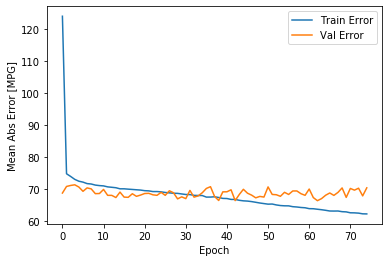

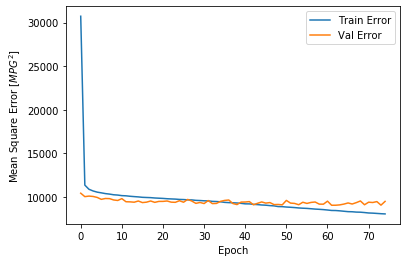

In [108]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')

  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')

  plt.legend()
  plt.show()


plot_history(history)

In [109]:
test_predictions = model.predict(x_test)
pd.DataFrame(test_predictions).to_csv("out.csv")